<!-- ![image.png](attachment:image.png) -->

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

##### READING DATA

In [4]:
df=pd.read_csv(r"C:\Users\hp\Desktop\MODEL\hotel_bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [5]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [6]:
df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type     adr  \
119385  394.0      NaN                     0     Transient   96.14   
119386    9.0      NaN                     0     Transient  225.43   
119387    9.0      NaN                     0     Transient  157.71   
119388   89.0      NaN                     0     Transient  104.40   
119389    9.0      NaN                     0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  
119385          Check-Out              2017-09-06  
119386          Check-Out              2017-09-07  
119387          Check-Out              2017-09-07  
119388          Check-Out              2017-09-07  
119389          Check-Out              2017-09-07

In [7]:
df.shape   #119390 ROWS and 32 COLUMNS

(119390, 32)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# first see if there is any date column in the data ,if it is present then convert into the date&time

In [11]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [12]:
df.describe(include="object")    #if you write include in the describe then it gives you the stats for object variable

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status  
count        119390        119390             119390  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104641         89613              75166

In [13]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-")

hotel
['Resort Hotel' 'City Hotel']
-
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
-
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ET

### EDA ON ALL FEATURES

## 1.TOP 10 COUNTRIES OF ORIGIN OF HOTEL VISITORS(GUEST)

In [14]:
df['country'].value_counts(normalize = True)[:10].to_frame("Percentage")*100

Percentage
PRT   40.865587
GBR   10.200838
FRA    8.759314
ESP    7.205934
DEU    6.128576
ITA    3.167314
IRL    2.838472
BEL    1.969689
BRA    1.870448
NLD    1.769524

Text(0, 0.5, 'Reservation Count')

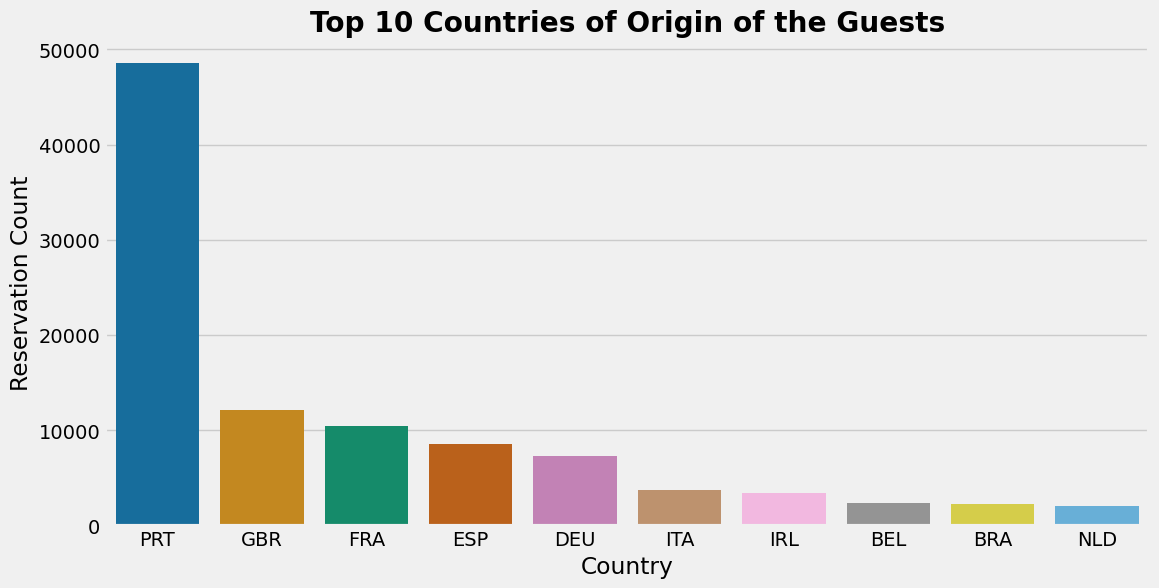

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')



##### About 40% of all bookings are created from Portugal followed by Great Britain (10%) & France (8%)
    

## 2. Which Month is the Most Occupied (Busiest) with Bookings at the Hotel

In [16]:
df['arrival_date_month'].value_counts(normalize = True).to_frame("Percentage")*100

Percentage
August      11.623252
July        10.604741
May          9.876037
October      9.347517
April        9.288048
June         9.162409
September    8.801407
March        8.203367
February     6.757685
November     5.690594
December     5.678868
January      4.966078

Text(0, 0.5, 'Reservation Count')

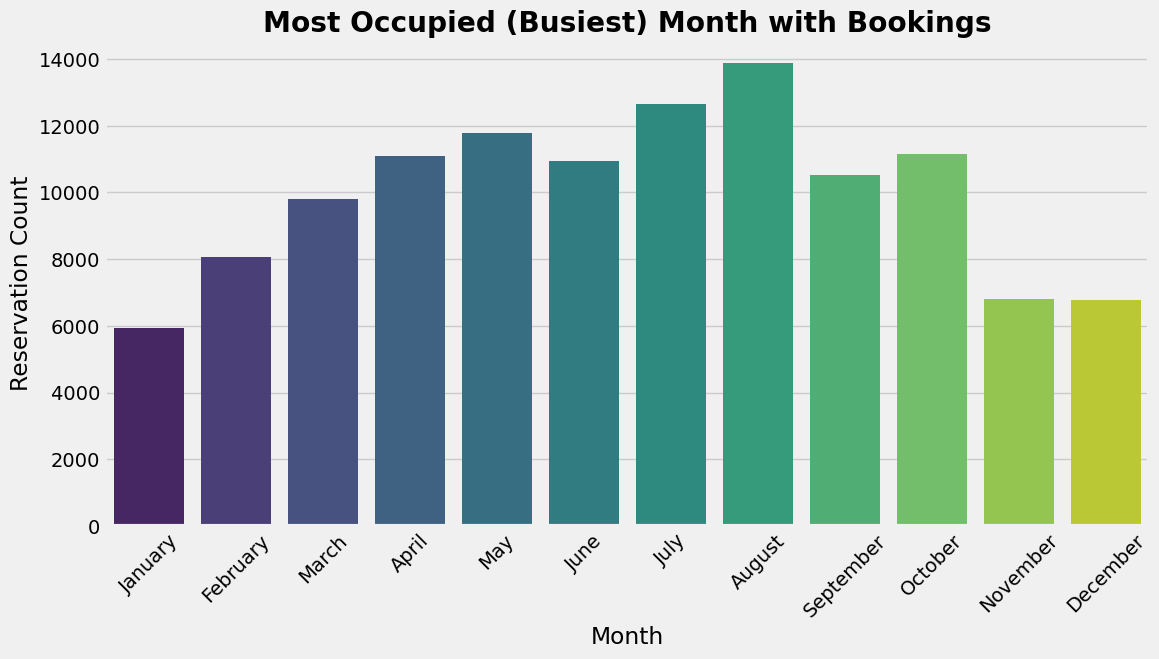

In [17]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
plt.figure(figsize=(12,6))
sns.countplot(x='arrival_date_month', data = df,palette= 'viridis')
plt.title('Most Occupied (Busiest) Month with Bookings', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Reservation Count')

##### August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

## 3. How many Bookings were Cancelled at the Hotel?

In [18]:
df['is_canceled'].value_counts(normalize = True).to_frame("percentage")*100

percentage
0   62.958372
1   37.041628

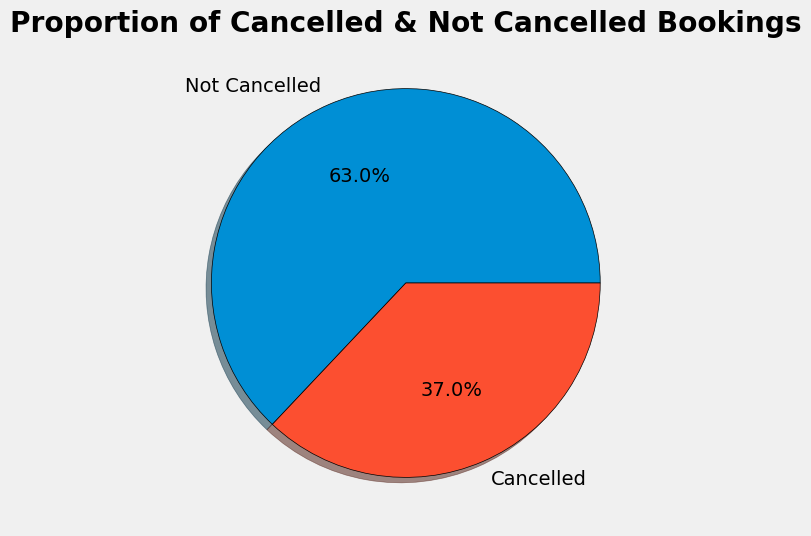

In [19]:
proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.figure(figsize=(12,6))
plt.title('Proportion of Cancelled & Not Cancelled Bookings',weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops={'fontsize': 14})
plt.show()

#### According to the pie chart, 63% bookings were not cancelled and 37% of the bookings were cancelled at the Hotel.

## 4. Which Month has Highest Number of Cancellations By Hotel Type?

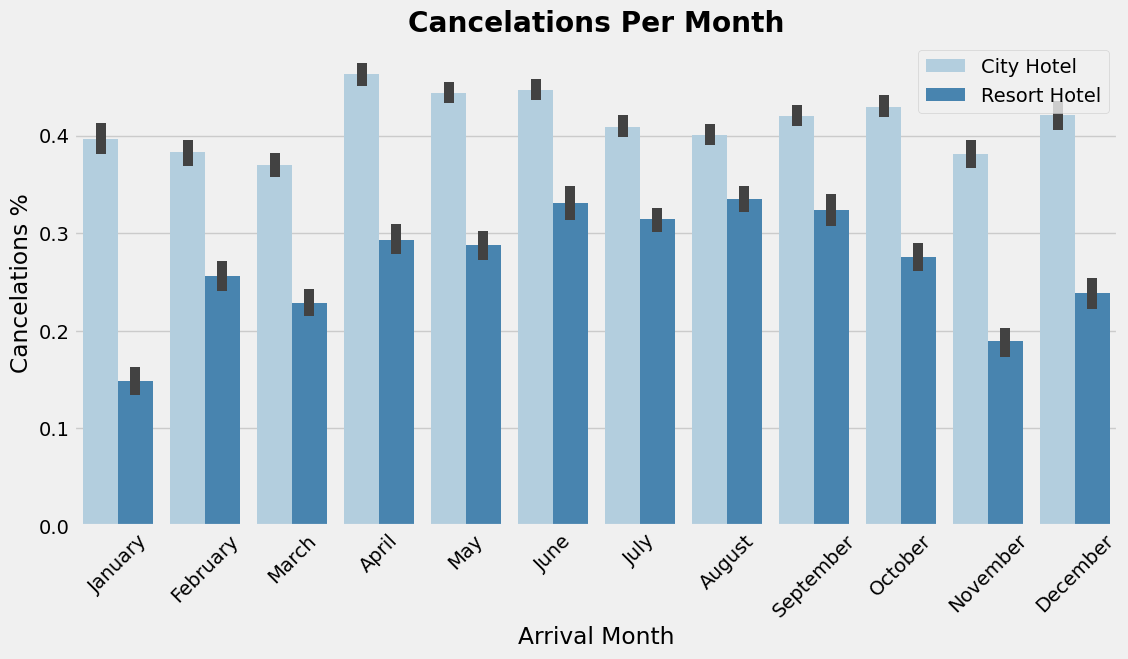

In [20]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
plt.figure(figsize=(12,6))
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,palette= 'Blues')
plt.title("Cancelations Per Month", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations %")
plt.legend(loc="upper right")
plt.show()

#### City hotel : The number of cancelations per month is around 40% throughout the year.
  

#### .Resort hotel : The number of cancellations are highest in the summer (June,July, August) and lowest   during the winter (November,December,January). In short, the possibility of cancellation for resort   hotels in winter is very low.

## 5. How many Bookings were Cancelled by Hotel Type?

In [21]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True).to_frame("Percentage")*100

Percentage
is_canceled hotel                   
0           City Hotel     61.501211
            Resort Hotel   38.498789
1           City Hotel     74.850760
            Resort Hotel   25.149240

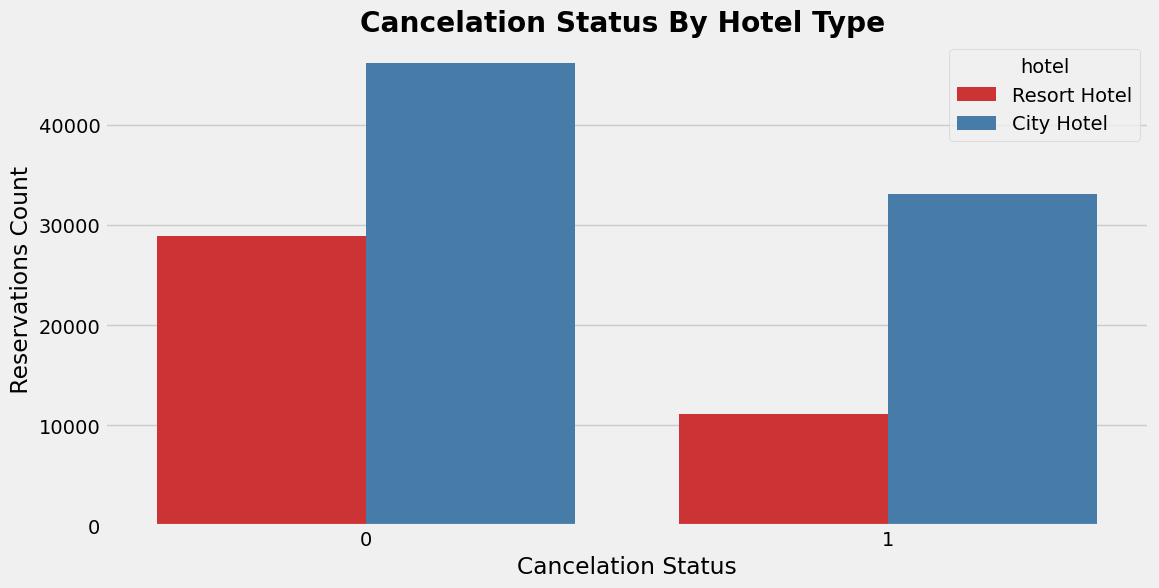

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()


## 6. Relationship between Average Daily Rate(ADR) and Arrival Month by Booking cancellation status

In [23]:
df['market_segment'].value_counts(normalize = True).to_frame("Percentage")*100

Percentage
Online TA       47.304632
Offline TA/TO   20.285619
Groups          16.593517
Direct          10.558673
Corporate        4.435045
Complementary    0.622330
Aviation         0.198509
Undefined        0.001675

Text(0, 0.5, 'Reservation Count')

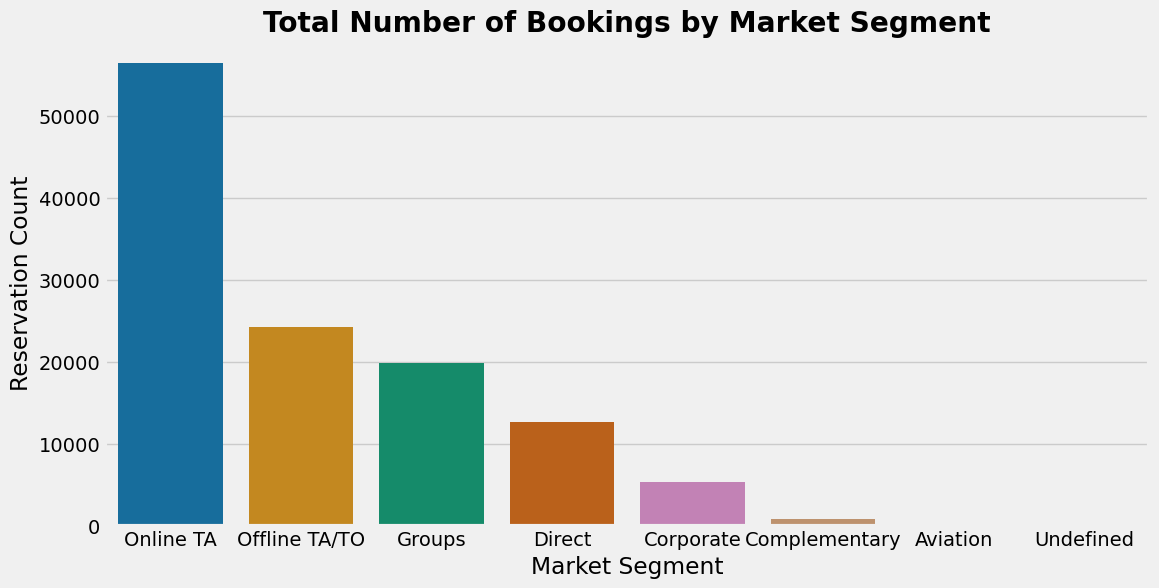

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(df['market_segment'], palette='colorblind',order=pd.value_counts(df['market_segment']).index)
plt.title('Total Number of Bookings by Market Segment', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

##### Above graph depicts that 47.3% of bookings are made via Online Travel Agents


##### Around 20% of bookings are made via Offline Travel Agents and less than 20% of bookings made directly without any Agents

## 8.Total Nights Spent by Guests at the Hotel by Market Segment and Hotel Type

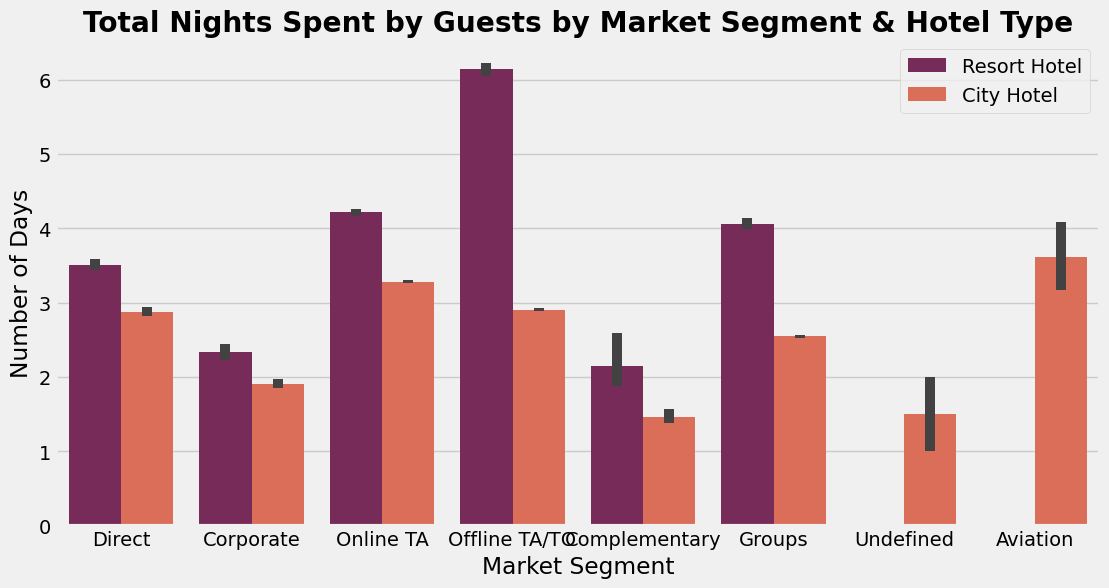

In [25]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] 
plt.figure(figsize=(12,6))
sns.barplot(x = "market_segment", y = "total_stay", data = df, hue = "hotel", palette = 'rocket')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

##### City Hotel: Most of guests prefer to stay between 1-4 nights
Resort Hotel : Most of the guests prefer to stay more than 3 nights

## 9. Arrival Date Year vs Lead Time By Booking Cancellation Status

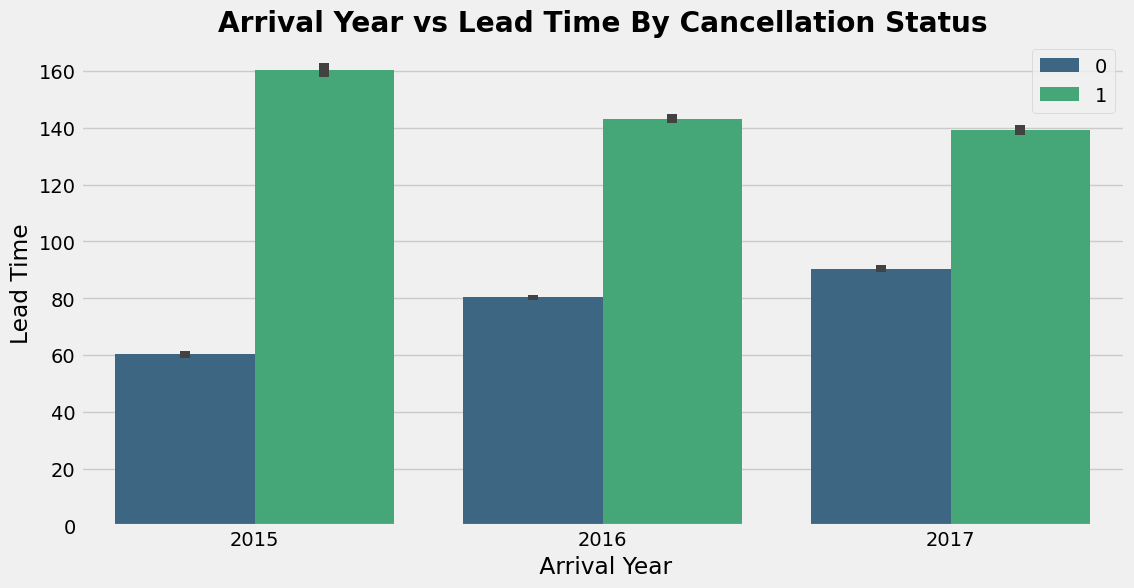

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="viridis")
plt.title('Arrival Year vs Lead Time By Cancellation Status', weight='bold')
plt.xlabel(' Arrival Year')
plt.ylabel('Lead Time')
plt.legend(loc = "upper right")

##### For all the 3 years, bookings with lead time more than 100 days has more chances of getting cancelled

## 10. Total Number of bookings by deposit type

In [27]:
df['deposit_type'].value_counts(normalize = True).to_frame("Percentage")*100

Percentage
No Deposit   87.646369
Non Refund   12.217941
Refundable    0.135690

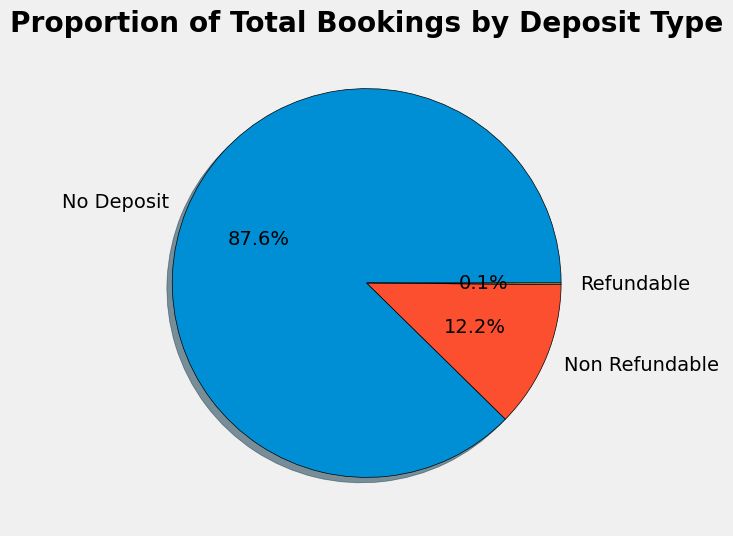

In [28]:
proportion = df['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.figure(figsize=(12,6))
plt.title('Proportion of Total Bookings by Deposit Type',weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops={'fontsize': 14})
plt.show()

##### Around 87.6% bookings are booked without deposit, 12.2% bookings are booked with Non Refundable Policy and 0.1% bookings are booked with Refundable Policy

### DATA PREPARATION

After exploring the dataset, we will find a lot of information that will help you prepare the data. Most important steps in Data Preparation are:

1.Handling Missing Values


2.Exploring Numerical and Categorical Features

3.Feature Engineering (Encoding Categorical Features)

4.Feature Selection (Correlation Heat Map)

#### HANDLING MISSING VALUES

In [29]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [30]:
# Check % of Missing Values in the Data set
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


“Company” feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the “Company” feature.


“Agent” feature has 13.69% missing values.Agent feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Therefore, missing data for “Agent” can be filled by 0.

“Country” feature has 0.4% missing values. Since missing data of “Country” is less than 1%, we can will impute with most frequent value (Mode).

“Children” feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.

In [31]:
#Dropping the "Company" feature
df.drop(columns = ['company'],inplace= True)

In [32]:
#Filling missing values by 0 for "Agent" feature
df['agent']= df['agent'].fillna(0)

In [33]:
#Imputing missing values of "Country" feature
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [34]:
#Filling missing values by 0 for "Children" feature 
df['children']= df['children'].fillna(0)

In [35]:
df1=df.copy()

## Feature Engineering (Encoding Categorical Features)

In [36]:
cat_feature = [feature for feature in df1.columns if df1[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  10


In [37]:
df1[cat_feature][:5]

hotel meal country market_segment distribution_channel  \
0  Resort Hotel   BB     PRT         Direct               Direct   
1  Resort Hotel   BB     PRT         Direct               Direct   
2  Resort Hotel   BB     GBR         Direct               Direct   
3  Resort Hotel   BB     GBR      Corporate            Corporate   
4  Resort Hotel   BB     GBR      Online TA                TA/TO   

  reserved_room_type assigned_room_type deposit_type customer_type  \
0                  C                  C   No Deposit     Transient   
1                  C                  C   No Deposit     Transient   
2                  A                  C   No Deposit     Transient   
3                  A                  A   No Deposit     Transient   
4                  A                  A   No Deposit     Transient   

  reservation_status  
0          Check-Out  
1          Check-Out  
2          Check-Out  
3          Check-Out  
4          Check-Out

In [38]:
# Identify unique (Distinct) labels that exists in each categorical features
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df1[feature].unique())))

hotel : 2 labels 
meal : 5 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 10 labels 
assigned_room_type : 12 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 


In [39]:
#Custom mapping
df1['hotel'] = df1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df1['arrival_date_month'] = df1['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [40]:
#Replacing "Undefined" with "SC" as mentioned in data set description
df1["meal"].replace("Undefined", "SC", inplace=True)

In [41]:
# # Label encoding is a technique used to convert categorical data into numerical data.
# # This is done by assigning a unique integer to each category. For example, if you have a column
# of data that contains the names of fruits, you could use label encoding to convert the column into
# a column of integers that represent the fruit names.

In [42]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['meal'] = le.fit_transform(df1['meal'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['country'] = le.fit_transform(df1['country'])

# Feature Selection

#### Feature selection is the process of identifying and selecting the most relevant and informative features from a dataset to improve model performance and interpretability.

In [43]:
# Relationship between Independent and Dependent feature (Correlation Heat map)
df1.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
reservation_status_date          -0.162135
booking_changes                  -0.144381
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
agent                            -0.046529
babies                           -0.032491
meal                             -0.015693
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
total_stay                        0.017779
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
adults     

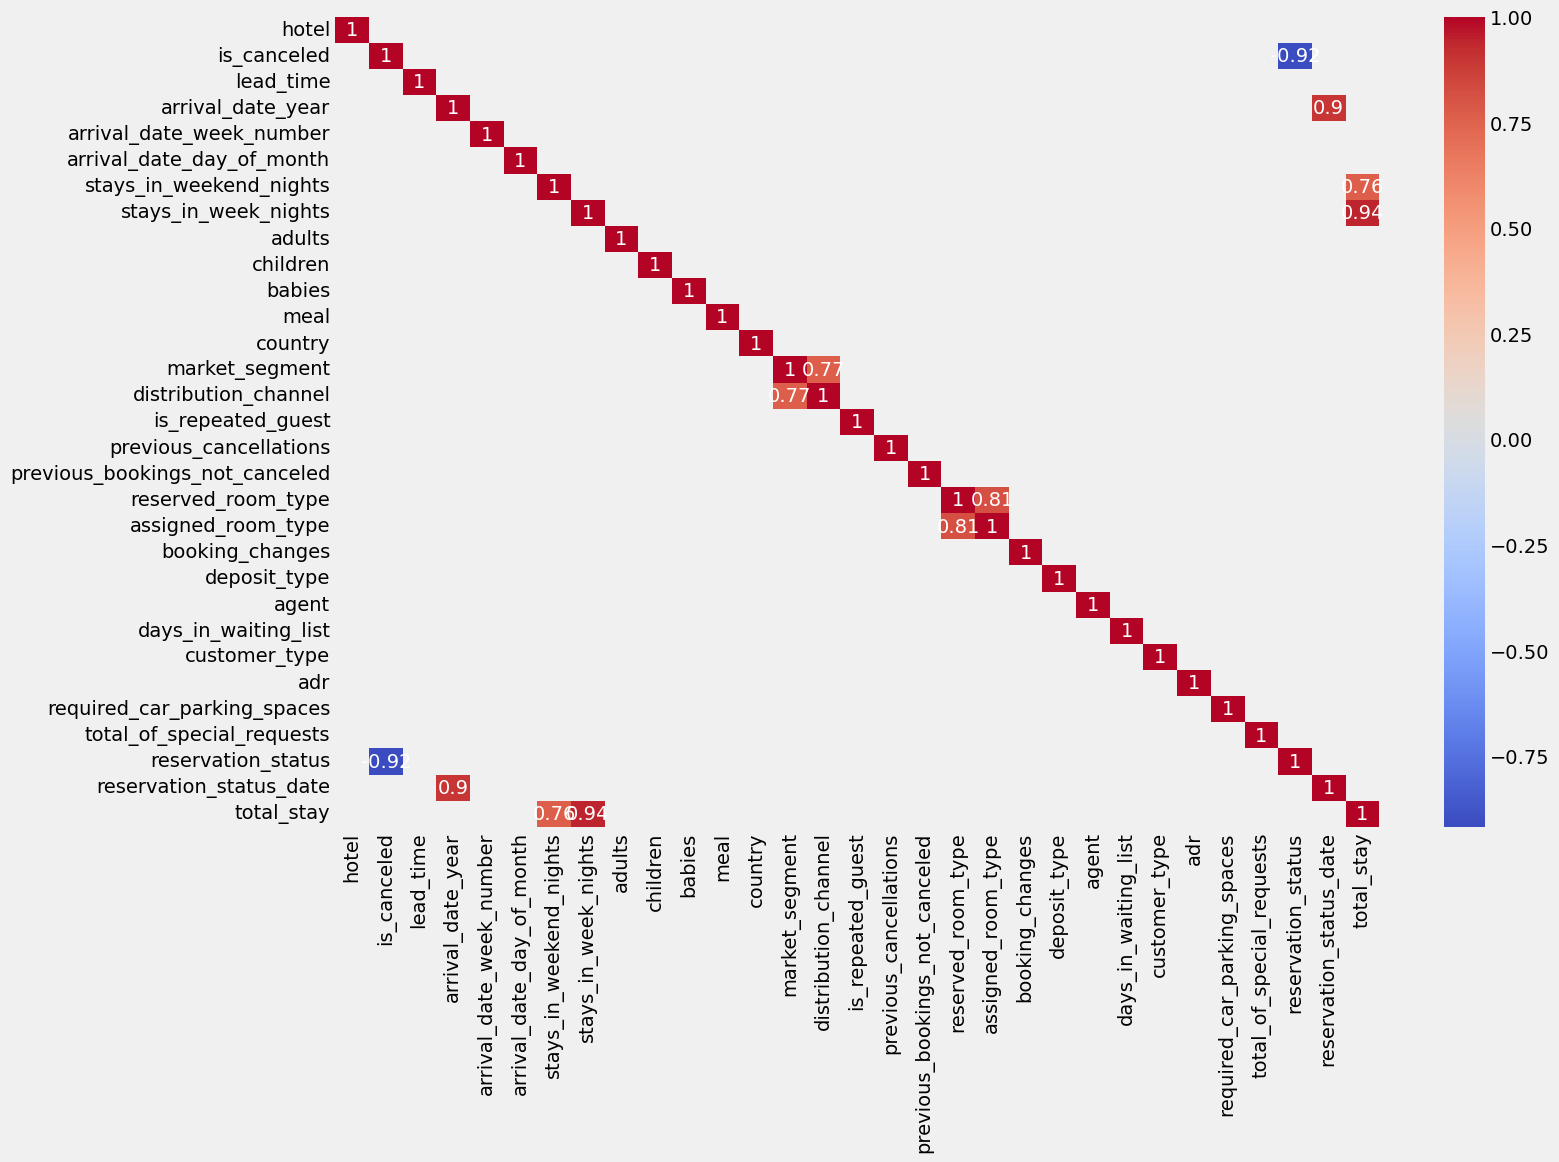

In [44]:
cr=df1.corr()
plt.figure(figsize=(15,10))
cr=cr[abs(cr)>=.7]
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()

#### “reservation_status” seems to be most impactful feature and because of its negative correlation with the “is_canceled” feature it can cause a wrong prediction or overfitting and there is chance of data leakage. Hence I will drop this feature.I will not use arrival_date_week_number, arrival_date_month, arrival_date_year,stays_in_week_nights, stays_in_weekend_nights since their importances are really low while predicting cancellations.“reservation_status_date” is date type data and it could not convert another type, this feature can also be dropped

In [45]:
df1.drop(columns = ['reservation_status','arrival_date_week_number','arrival_date_month','arrival_date_year','stays_in_week_nights','stays_in_weekend_nights','reservation_status_date'],inplace = True)

In [46]:
df2=df1.copy()
df2.head()


hotel  is_canceled  lead_time  arrival_date_day_of_month  adults  children  \
0      0            0        342                          1       2       0.0   
1      0            0        737                          1       2       0.0   
2      0            0          7                          1       1       0.0   
3      0            0         13                          1       1       0.0   
4      0            0         14                          1       2       0.0   

   babies  meal  country  market_segment  distribution_channel  \
0       0     0      135               3                     1   
1       0     0      135               3                     1   
2       0     0       59               3                     1   
3       0     0       59               2                     0   
4       0     0       59               6                     3   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   reserved_room_type  assigned_room_type  booking_changes  deposit_type  \
0                   2                   2                3             0   
1                   2                   2                4             0   
2                   0                   2                0             0   
3                   0                   0                0             0   
4                   0                   0                0             0   

   agent  days_in_waiting_list  customer_type   adr  \
0    0.0                     0              2   0.0   
1    0.0                     0              2   0.0   
2    0.0                     0              2  75.0   
3  304.0                     0              2  75.0   
4  240.0                     0              2  98.0   

   required_car_parking_spaces  total_of_special_requests  total_stay  
0                            0                          0           0  
1                            0                          0           0  
2                            0                          0           1  
3                            0                          0           1  
4                            0                          1           2

In [47]:
df2.shape

(119390, 25)

## MODELLING

-The next step now is to build a Machine learning model using a Machine learning Algorithm. In this    project, we will build Decision Tree Machine Learning Model using Scikit Learn Library.

-We need to divide/split the data into training and test sets using train_test_split.

-For better training of a machine learning model, it is necessary to divide the training data with more numbers (70% to 80%) of samples and the test set with 20% to 30% of the dataset depending on the size of the data.

### What is Decision Tree Algorithm?

Decision tree algorithm is one of the most versatile algorithms in machine learning which can perform both classification and regression analysis. It is very powerful and works great with complex datasets. Apart from that, it is very easy to understand and read.

As the name suggests, this algorithm works by dividing the whole dataset into a tree-like structure based on some rules and conditions and then gives prediction based on those conditions.

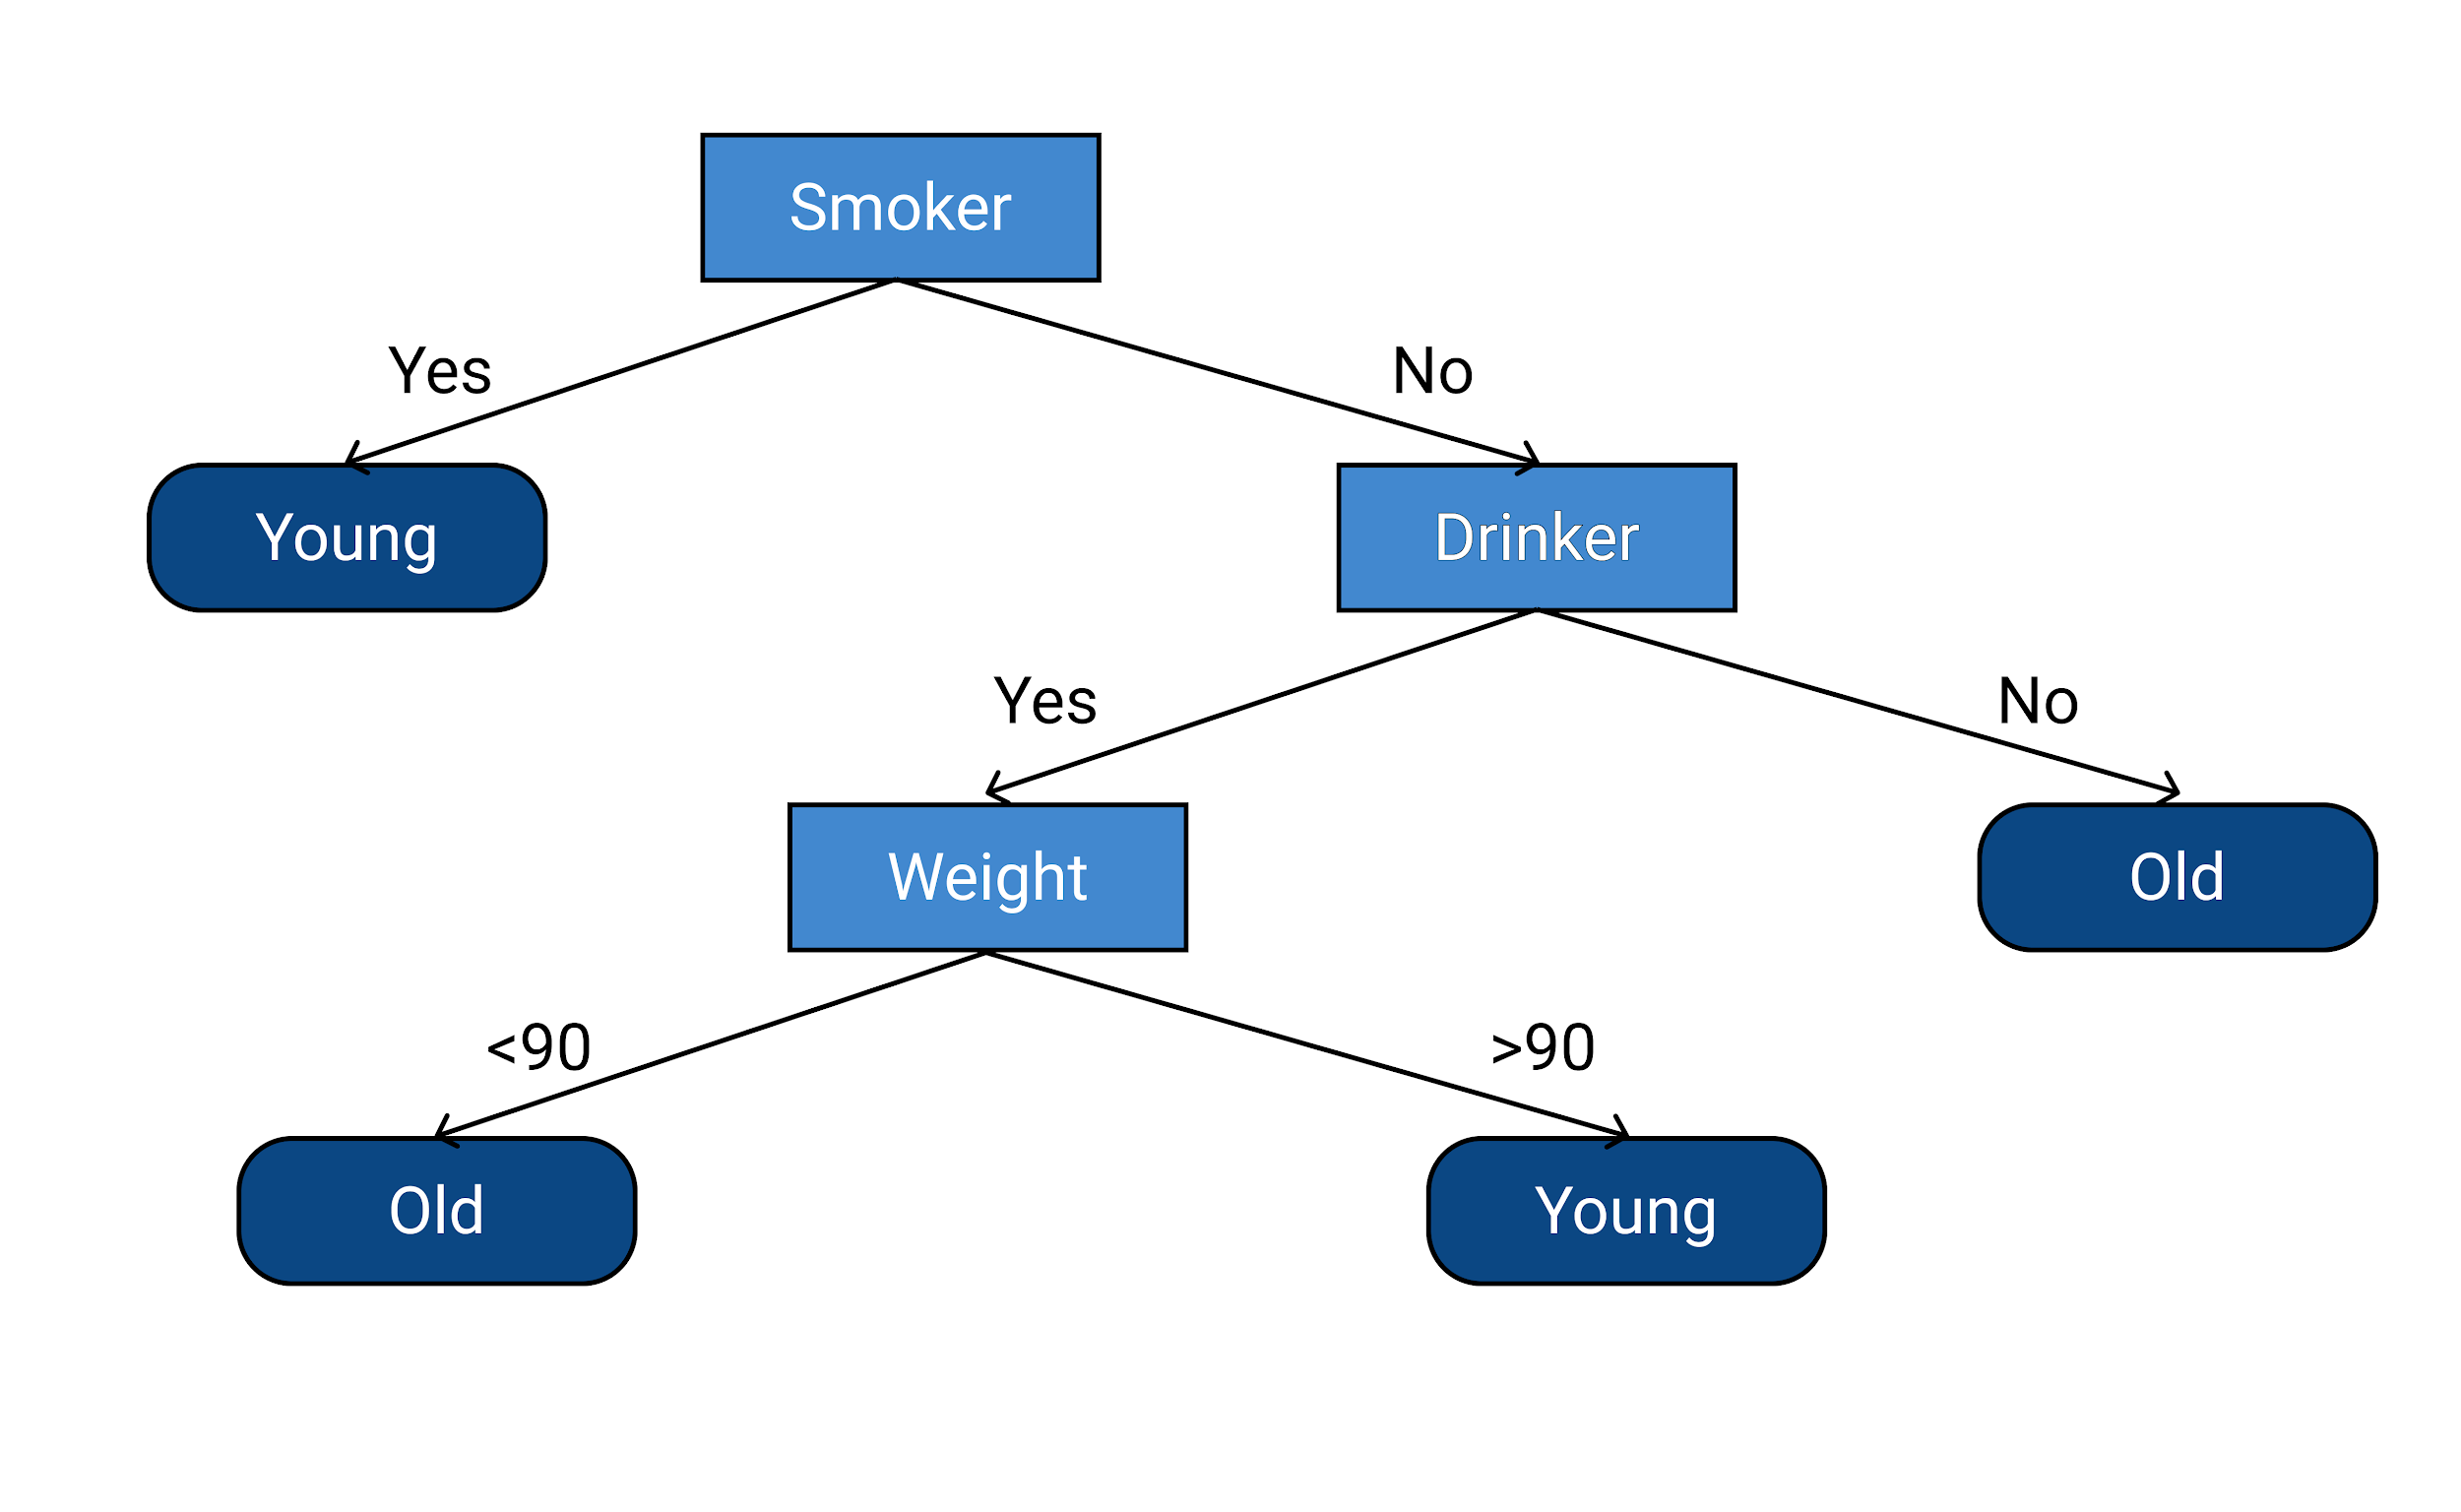

The tree consists of decision nodes and leaves.
Leaves are the decisions or the final outcomes.
Decision nodes are where the data is split based on a certain attribute.
Objective is to minimize the entropy which provides the optimum split


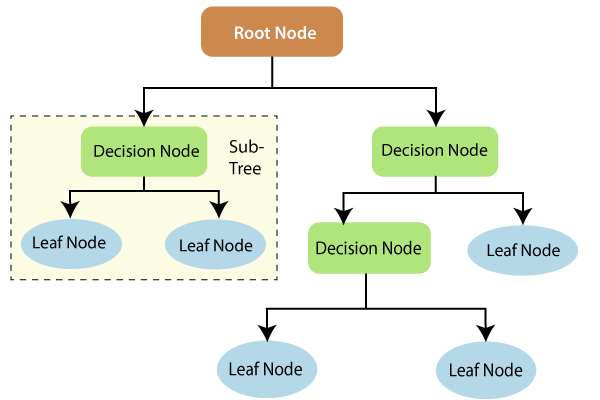

## How does a Decision Tree Algorithm decide where to split?

#### Attribute Selection Measures

Attribute selection measure can be used as a basic set of rules to select the splitting criterion that helps in dividing the dataset in the best possible way. The splitting feature is always a best score attribute. Entropy, Information Gain, Gini Index and Gain Ratio are the most commonly used and popular selection measures.

#### Entropy

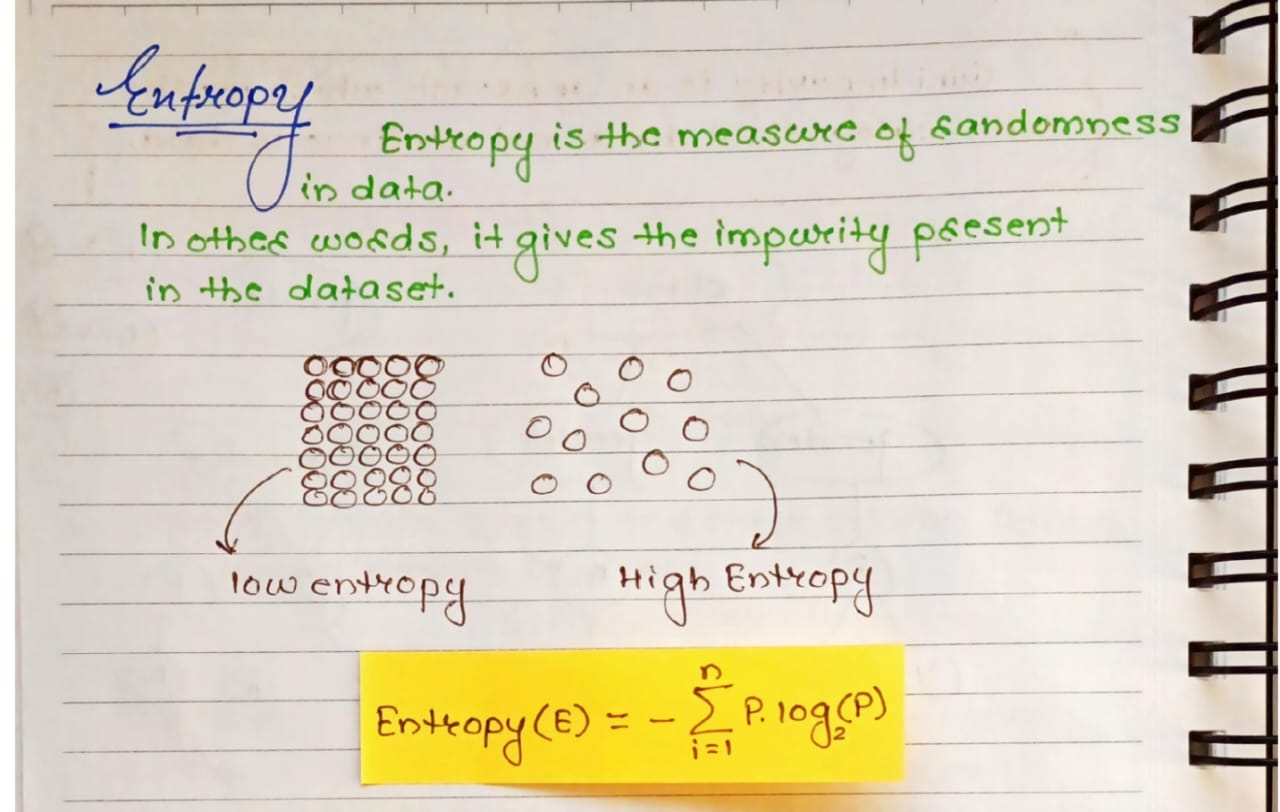

#### Information Gain

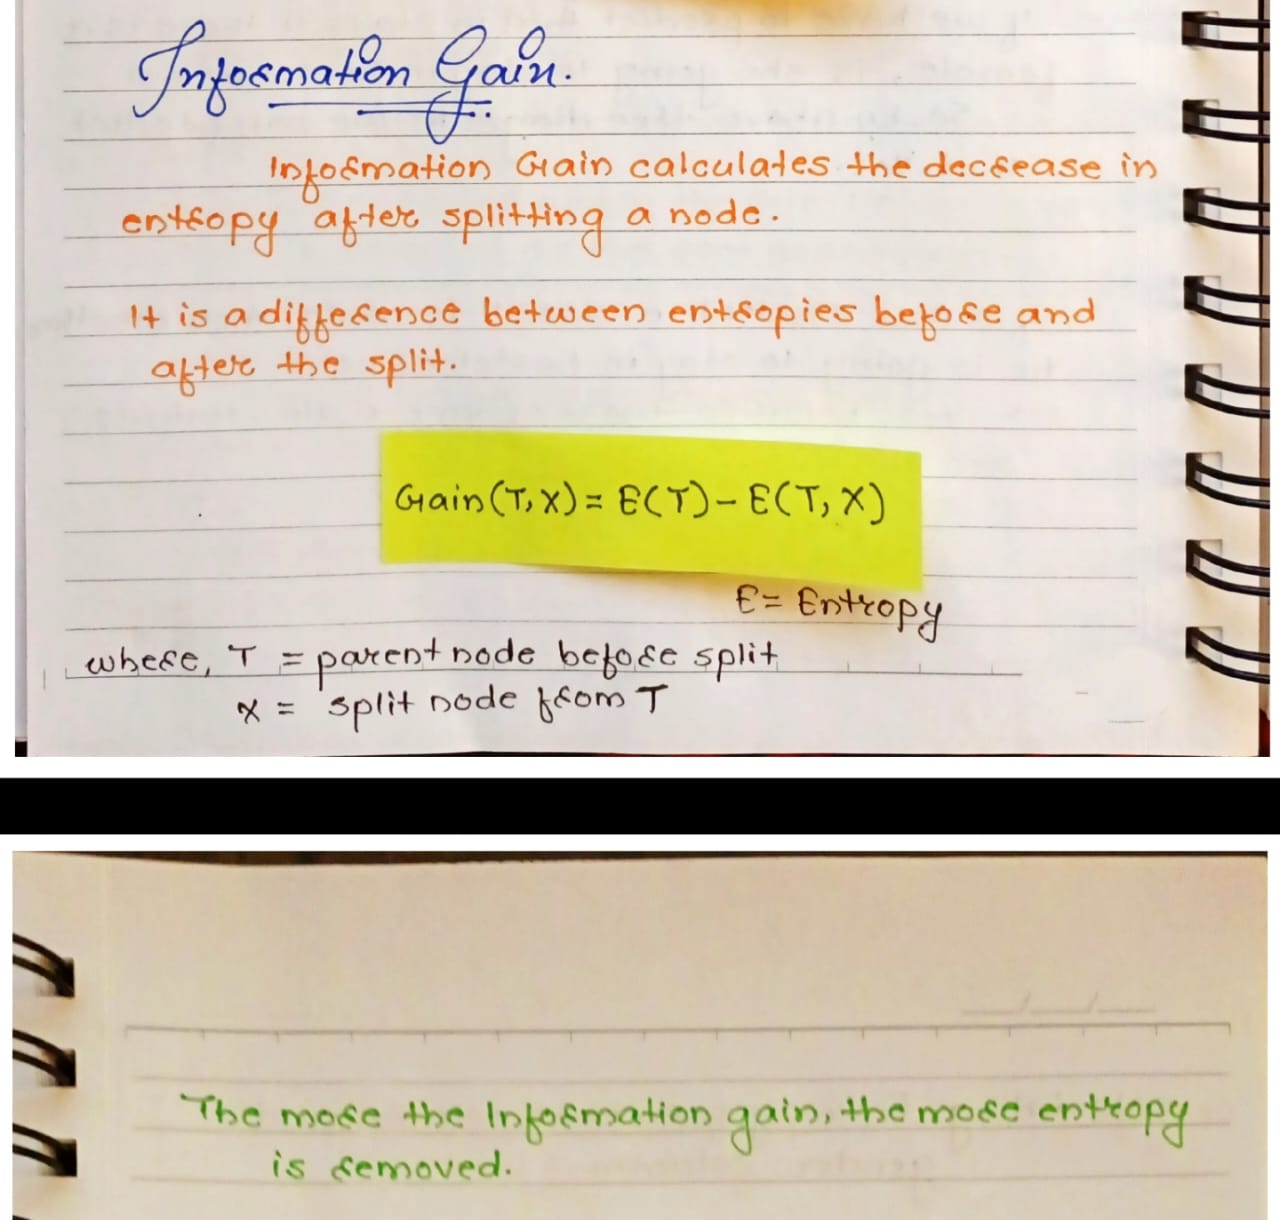

#### Gini Index

The Gini index is a measure of how pure or impure a node in a decision tree is. A pure node is one where all the data points belong to the same class, while an impure node is one where the data points are spread out across multiple classes. The Gini index is calculated by taking the sum of the probabilities of each class being present in the node. A lower Gini index indicates a more pure node, while a higher Gini index indicates a more impure node.

The Gini index is used to select the best split point for a decision tree. The split point that results in the lowest Gini index is the one that will most effectively reduce the impurity of the node. This is because the split point will create two new nodes, one containing all the data points that belong to the majority class and the other containing all the data points that belong to the minority class. The Gini index of each of these new nodes will be lower than the Gini index of the original node.

### DECISION TREE IMPLEMENTATION

In [48]:
X = df2.drop(['is_canceled'], axis = 1)
y = df2['is_canceled']

In [49]:
#Train and test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y,test_size = 0.30)

In [50]:
#Checking if train and test data of target feature is equally distributed
y_train.value_counts(normalize=True)

0    0.629581
1    0.370419
Name: is_canceled, dtype: float64

In [51]:
y_test.value_counts(normalize=True)

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

## Model Training

-Steps to be followed to build Machine Learning Model with Scikit-learn

1.Import and choose the classifier you plan to use

2.Instantiate the Estimator

3.Fit the model with data

4.Predict the Target feature for a new observation

In [52]:
# import the class
from sklearn.tree import DecisionTreeClassifier

# instantiate the estimator(model)
dt_model = DecisionTreeClassifier(random_state = 42)

#fit the model with data
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

DecisionTreeClassifier(random_state=42)

In [54]:
#Predict the Target feature for a new observation
dt_model.predict(X_train)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
#Accuracy score on Training Data
dt_model.score(X_train,y_train)

0.996434255082383

The training set accuracy is close to 100%! But we can’t rely solely on the training set accuracy, we must evaluate the model on the test data set too.

We can make predictions and compute accuracy in one step using model.score

In [56]:
#Accuracy score on Testing Data
dt_model.score(X_test,y_test)

0.8441242985174637

It appears that the model has learned the training data perfect (99%), and doesn’t generalize well to previously unseen data (84%). This is called overfitting, and reducing overfitting is one of the most important parts of any machine learning project.

## Visualizing Decision Trees

[Text(0.5, 0.875, 'deposit_type <= 0.5\ngini = 0.466\nsamples = 83573\nvalue = [52616, 30957]'),
 Text(0.25, 0.625, 'lead_time <= 11.5\ngini = 0.406\nsamples = 73211\nvalue = [52468, 20743]'),
 Text(0.125, 0.375, 'required_car_parking_spaces <= 0.5\ngini = 0.197\nsamples = 16759\nvalue = [14900, 1859]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'country <= 134.5\ngini = 0.445\nsamples = 56452\nvalue = [37568, 18884]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'deposit_type <= 1.5\ngini = 0.028\nsamples = 10362\nvalue = [148, 10214]'),
 Text(0.625, 0.375, 'country <= 47.0\ngini = 0.012\nsamples = 10249\nvalue = [61, 10188]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'market_segment <= 5.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

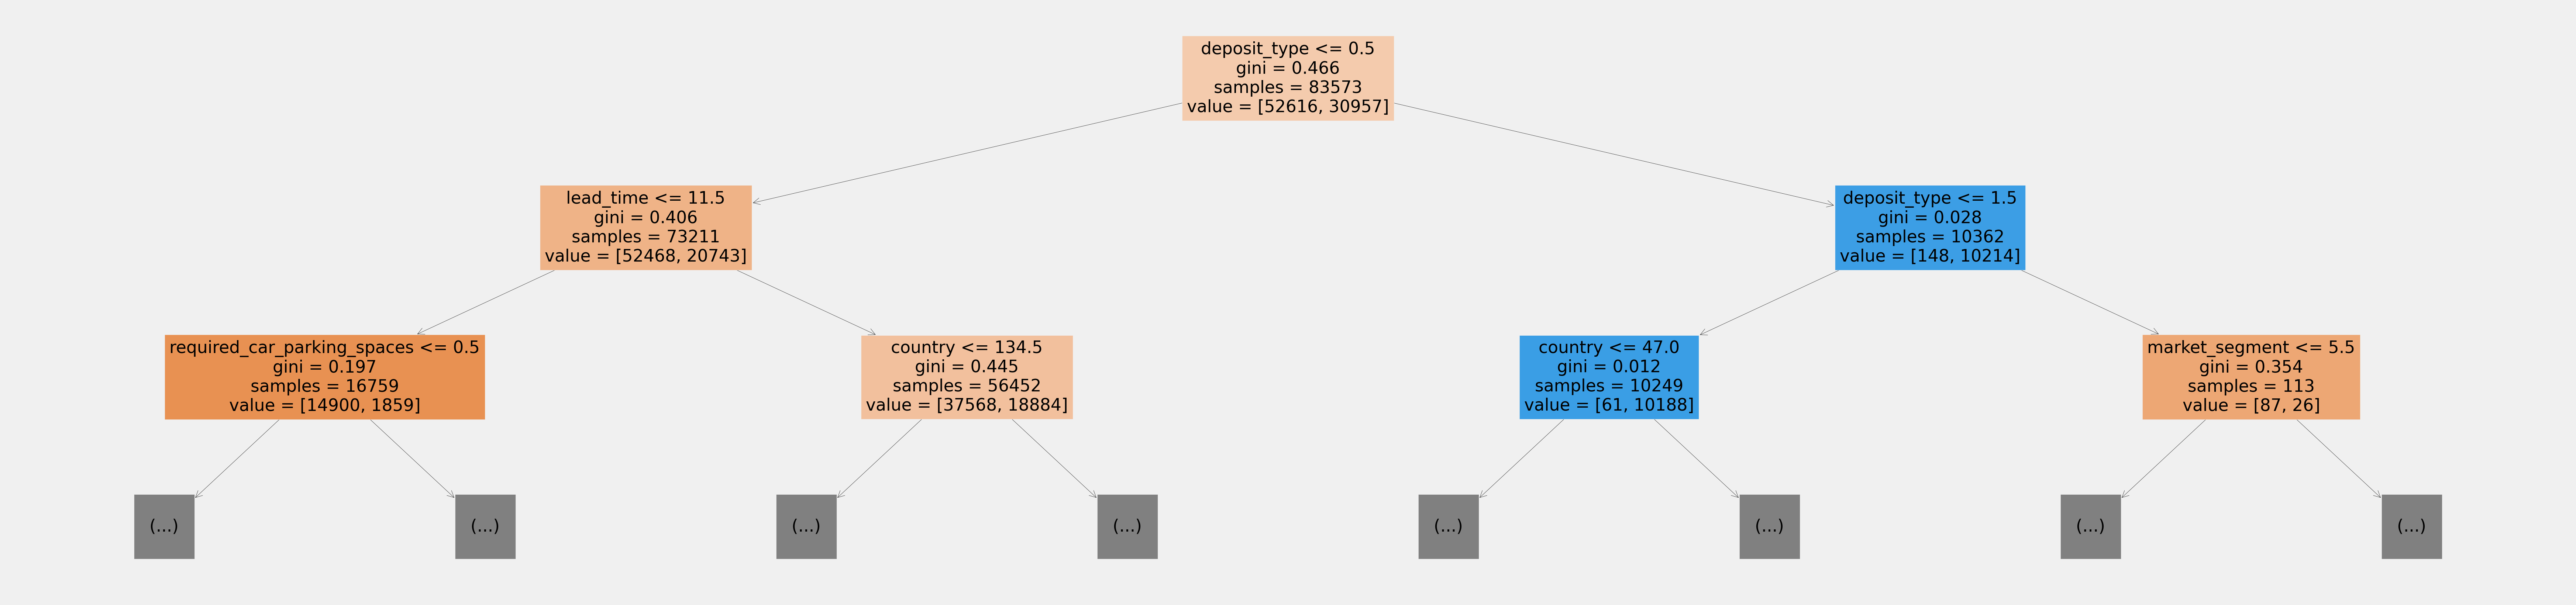

In [57]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(dt_model, feature_names=X_train.columns, max_depth=2, filled=True)

The Gini value in each box is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split.

Lower Gini index indicates a better split

## Feature Importance

Based on the Gini Index computations, a decision tree assigns an “importance” value to each feature. These values can be used to interpret the results given by a decision tree

In [58]:
dt_model.feature_importances_

array([0.00430979, 0.13396326, 0.0714008 , 0.01165362, 0.00543306,
       0.00069664, 0.01043204, 0.08195502, 0.06748312, 0.00350234,
       0.00182046, 0.02199886, 0.00573351, 0.01277278, 0.01703412,
       0.0153714 , 0.23543993, 0.06189516, 0.00334881, 0.02076981,
       0.09174907, 0.02378499, 0.05232125, 0.04513017])

In [59]:
#Convert this into a dataframe and visualize the most important features
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df

feature  importance
16                    deposit_type    0.235440
1                        lead_time    0.133963
20                             adr    0.091749
7                          country    0.081955
2        arrival_date_day_of_month    0.071401
8                   market_segment    0.067483
17                           agent    0.061895
22       total_of_special_requests    0.052321
23                      total_stay    0.045130
21     required_car_parking_spaces    0.023785
11          previous_cancellations    0.021999
19                   customer_type    0.020770
14              assigned_room_type    0.017034
15                 booking_changes    0.015371
13              reserved_room_type    0.012773
3                           adults    0.011654
6                             meal    0.010432
12  previous_bookings_not_canceled    0.005734
4                         children    0.005433
0                            hotel    0.004310
9             distribution_channel    0.003502
18            days_in_waiting_list    0.003349
10               is_repeated_guest    0.001820
5                           babies    0.000697

Text(0, 0.5, 'Features')

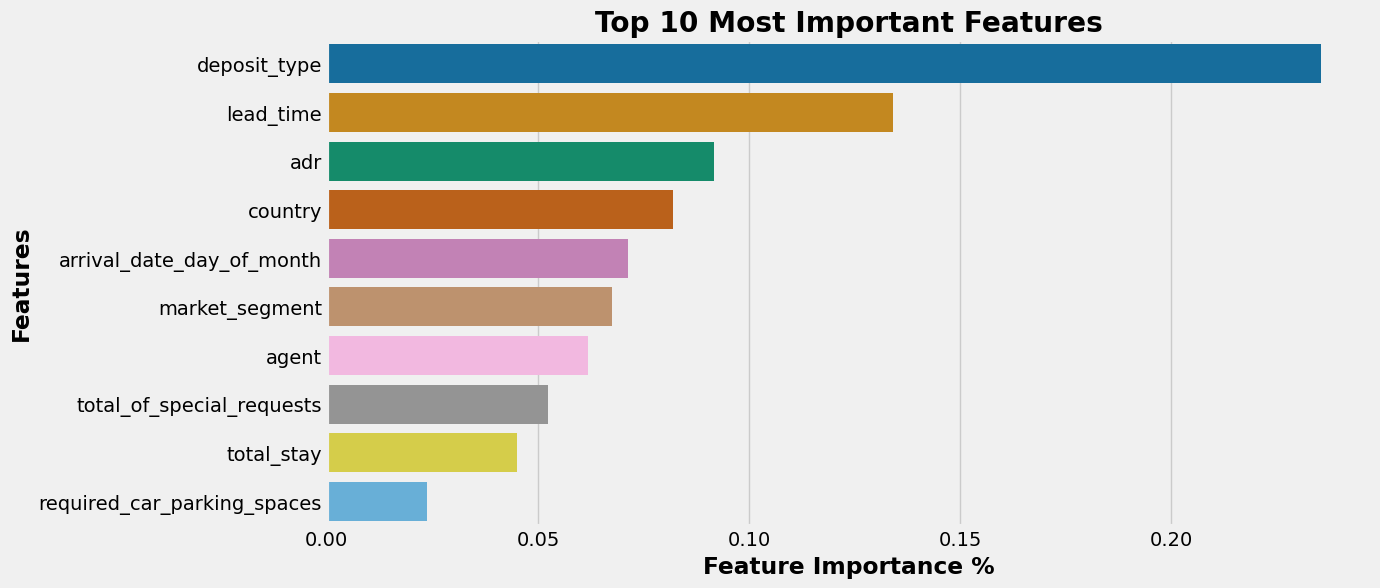

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature',palette= 'colorblind')
plt.title('Top 10 Most Important Features', weight='bold')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold')

## Model Evaluation

We can increase the model performance by hyperparameter tuning and finding these optimal hyperparameters would help us achieve the best-performing model.

GridSearchCV uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This will cost us the processing time and expense but will surely give us the best results.

Cross Validation is a statistical method used to estimate the performance (or accuracy) of Machine learning Models. It is used to protect against overfitting in a predictive model.

In [ ]:
# Hyper Parameter Tuning using Grid SeachCV on Decision Tree Algorithm to check Best score and Best parameters

from sklearn.model_selection import GridSearchCV

param_grid= { 'criterion' : ['gini', 'entropy'],'min_samples_split' : [2,4,6,8],
                  'min_samples_leaf': [1,2,3,4,5],'max_features' : ['auto', 'sqrt'],'max_depth': [1,2,3,4,5,6,7,8,9,10]}

clf = GridSearchCV(estimator=dt_model, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Decision Tree Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

Best score is 0.8155264977113239
Best parameters are {‘criterion’: ‘gini’, ‘max_depth’: 10, ‘max_features’: ‘auto’, ‘min_samples_leaf’: 1, ‘min_samples_split’: 6}

In [62]:
# Stratified K-fold Cross Validation Technique on Decision Tree Alogorithm to know the exact Mean CV accuracy score
# Impute the best parameters obtained in Hyper Parameter tuning for Decision Tree Algorithm

from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 42)

dt_cv_result = cross_val_score(DecisionTreeClassifier(criterion = 'gini',max_depth = 10, max_features = 'auto', min_samples_leaf = 1,min_samples_split = 6),X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
dt_cv = dt_cv_result.mean()*100
print('Decision Tree CV Mean Accuarcy Score is {}'.format(dt_cv))

Decision Tree CV Mean Accuarcy Score is 80.624842951671


Optimizing Decision Tree Model Performance

Impute the best parameters obtained in Hyper Parameter tuning for the newly created Decision Tree model to obtain Best Accuracy Score

In [63]:
# instantiate the estimator(new model)
dt_model_new = DecisionTreeClassifier(random_state = 42,criterion = 'gini',max_depth = 10, max_features = 'auto', 
                                      min_samples_leaf = 1,min_samples_split = 6)

#fit the new model with data
dt_model_new.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=6,
                       random_state=42)

In [64]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=6,
                       random_state=42)

In [65]:
#Accuracy score on Training Data
dt_model_new.score(X_train,y_train)

0.8099146853648905

In [66]:
#Accuracy score on Test Data
dt_model_new.score(X_test,y_test)

0.8047854370829495

#### CLASSIFICTION REPORT

In [67]:
from sklearn.metrics import classification_report

In [68]:
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     22550
           1       0.79      0.80      0.79     13267

    accuracy                           0.84     35817
   macro avg       0.83      0.83      0.83     35817
weighted avg       0.84      0.84      0.84     35817



It appears that the model has learned the training data perfect (80.99%), and it generalizes well on test (unseen) data (80.47%)

[Text(0.5, 0.875, 'deposit_type <= 0.5\ngini = 0.466\nsamples = 83573\nvalue = [52616, 30957]'),
 Text(0.25, 0.625, 'total_of_special_requests <= 0.5\ngini = 0.406\nsamples = 73211\nvalue = [52468, 20743]'),
 Text(0.125, 0.375, 'distribution_channel <= 2.5\ngini = 0.451\nsamples = 38990\nvalue = [25604, 13386]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'agent <= 7.5\ngini = 0.338\nsamples = 34221\nvalue = [26864, 7357]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'booking_changes <= 0.5\ngini = 0.028\nsamples = 10362\nvalue = [148, 10214]'),
 Text(0.625, 0.375, 'hotel <= 0.5\ngini = 0.015\nsamples = 10210\nvalue = [78, 10132]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'distribution_channel <= 2.0\ngini = 0.497\nsamples = 152\nvalue = [70, 82]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \

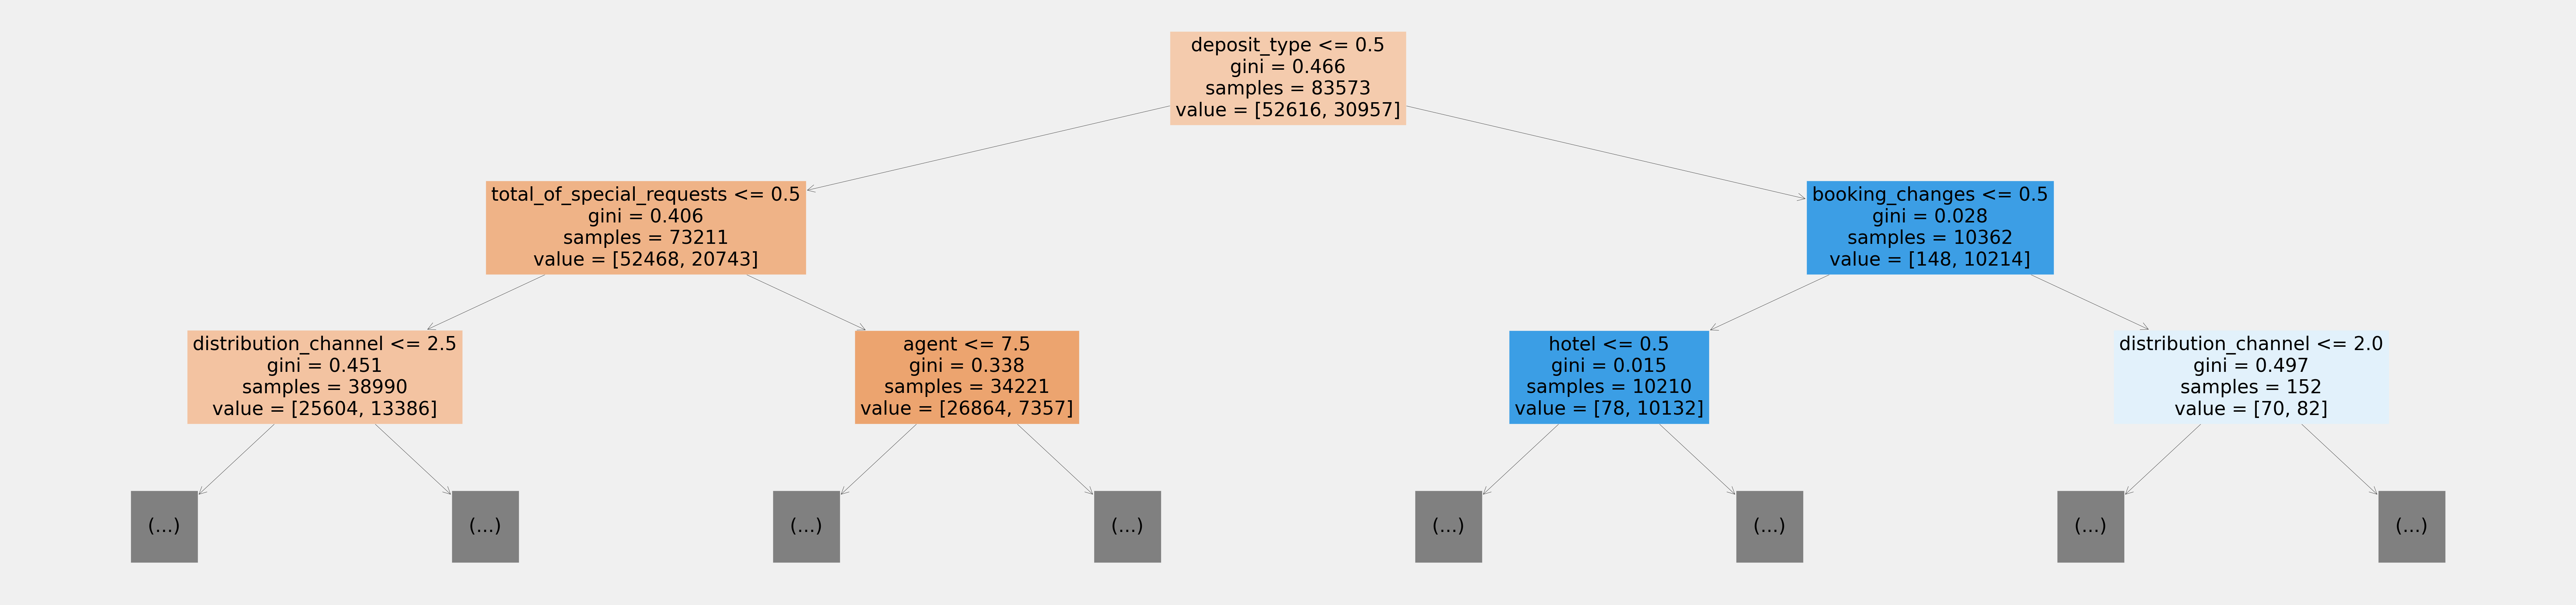

In [69]:
# Visualizing Optimized Decision Tree
plt.figure(figsize=(80,20))
plot_tree(dt_model_new, feature_names=X_train.columns, max_depth=2, filled=True)